# Mann-Whitney U test and t-test

In [8]:
# import libraries

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import itertools
from scipy.stats import mannwhitneyu, ttest_ind

import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
# Use iris data

iris_data = load_iris()
df_iris_data = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

print(df_iris_data.shape)
df_iris_data.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


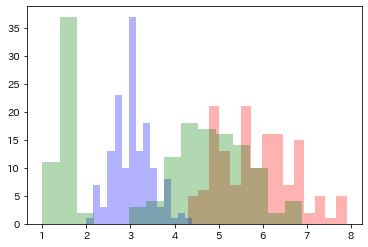

In [10]:
# Take a look at the distrbutions

plt.hist(df_iris_data['sepal length (cm)'], bins = 15, color = 'red', alpha = 0.3)
plt.hist(df_iris_data['sepal width (cm)'],  bins = 15, color = 'blue', alpha = 0.3)
plt.hist(df_iris_data['petal length (cm)'], bins = 15, color = 'green', alpha = 0.3)
#plt.hist(df_iris_data['petal width (cm)'],  bins = 15, color = 'black', alpha = 0.3)

plt.show()

### Mann-Whitney U test (= Wilcoxon rank-sum test) and Student t-test

In [4]:
# Convert Pandas Series to dictionary to perform tests

col_name = df_iris_data.columns.values
print(col_name)

keys = [df_iris_data.columns.values[0], df_iris_data.columns[1], df_iris_data.columns[2]]
values = [df_iris_data.iloc[:, 0], df_iris_data.iloc[:, 1], df_iris_data.iloc[:, 2]]

data_dict = {k: v for k, v in zip(keys, values)}
data_dict

['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']


{'sepal length (cm)': 0      5.1
 1      4.9
 2      4.7
 3      4.6
 4      5.0
       ... 
 145    6.7
 146    6.3
 147    6.5
 148    6.2
 149    5.9
 Name: sepal length (cm), Length: 150, dtype: float64,
 'sepal width (cm)': 0      3.5
 1      3.0
 2      3.2
 3      3.1
 4      3.6
       ... 
 145    3.0
 146    2.5
 147    3.0
 148    3.4
 149    3.0
 Name: sepal width (cm), Length: 150, dtype: float64,
 'petal length (cm)': 0      1.4
 1      1.4
 2      1.3
 3      1.5
 4      1.4
       ... 
 145    5.2
 146    5.0
 147    5.2
 148    5.4
 149    5.1
 Name: petal length (cm), Length: 150, dtype: float64}

In [5]:
# Make combinations for all pairs

comparison_pairs = []
for i in itertools.combinations(data_dict.keys(), 2):
    comparison_pairs.append(i)

print(comparison_pairs)

[('sepal length (cm)', 'sepal width (cm)'), ('sepal length (cm)', 'petal length (cm)'), ('sepal width (cm)', 'petal length (cm)')]


In [6]:
# Test for all pairs 1 - U-test

alpha = 0.05
print('Mann-Whitney U test')
print('Null hypothesis H0 = Distributions are equal')
print('Significance level alpha = ', alpha, '\n')

print('Test result')
for i in range(len(comparison_pairs)):
    pair_1 = data_dict.get(comparison_pairs[i][0])
    pair_2 = data_dict.get(comparison_pairs[i][1])
    s, p = mannwhitneyu(pair_1, pair_2, use_continuity = True)
    
    if p > alpha:
        print(comparison_pairs[i][0], '\t&', comparison_pairs[i][1], '\tp-value = %.4f' % (p), '\t\tSame distribution')
    else:
        print(comparison_pairs[i][0], '\t&', comparison_pairs[i][1], '\tp-value = %.4f' % (p), '\tDifferent distribution')

Mann-Whitney U test
Null hypothesis H0 = Distributions are equal
Significance level alpha =  0.05 

Test result
sepal length (cm) 	& sepal width (cm) 	p-value = 0.0000 	Different distribution
sepal length (cm) 	& petal length (cm) 	p-value = 0.0000 	Different distribution
sepal width (cm) 	& petal length (cm) 	p-value = 0.0000 	Different distribution


In [7]:
# Test for all pairs 2 - t-test

alpha = 0.05
print('Student t test')
print('Null hypothesis H0 = Distributions are equal')
print('Significance level alpha = ', alpha, '\n')

print('Test result')
for i in range(len(comparison_pairs)):
    pair_1 = data_dict.get(comparison_pairs[i][0])
    pair_2 = data_dict.get(comparison_pairs[i][1])
    s, p = ttest_ind(pair_1, pair_2, equal_var = False)
    
    if p > alpha:
        print(comparison_pairs[i][0], '\t&', comparison_pairs[i][1], '\tp-value = %.4f' % (p), '\t\tSame distribution')
    else:
        print(comparison_pairs[i][0], '\t&', comparison_pairs[i][1], '\tp-value = %.4f' % (p), '\tDifferent distribution')

Student t test
Null hypothesis H0 = Distributions are equal
Significance level alpha =  0.05 

Test result
sepal length (cm) 	& sepal width (cm) 	p-value = 0.0000 	Different distribution
sepal length (cm) 	& petal length (cm) 	p-value = 0.0000 	Different distribution
sepal width (cm) 	& petal length (cm) 	p-value = 0.0000 	Different distribution
